In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

from constants import *

sns.set()

## Informed Agent w/ Noise Traders Eval

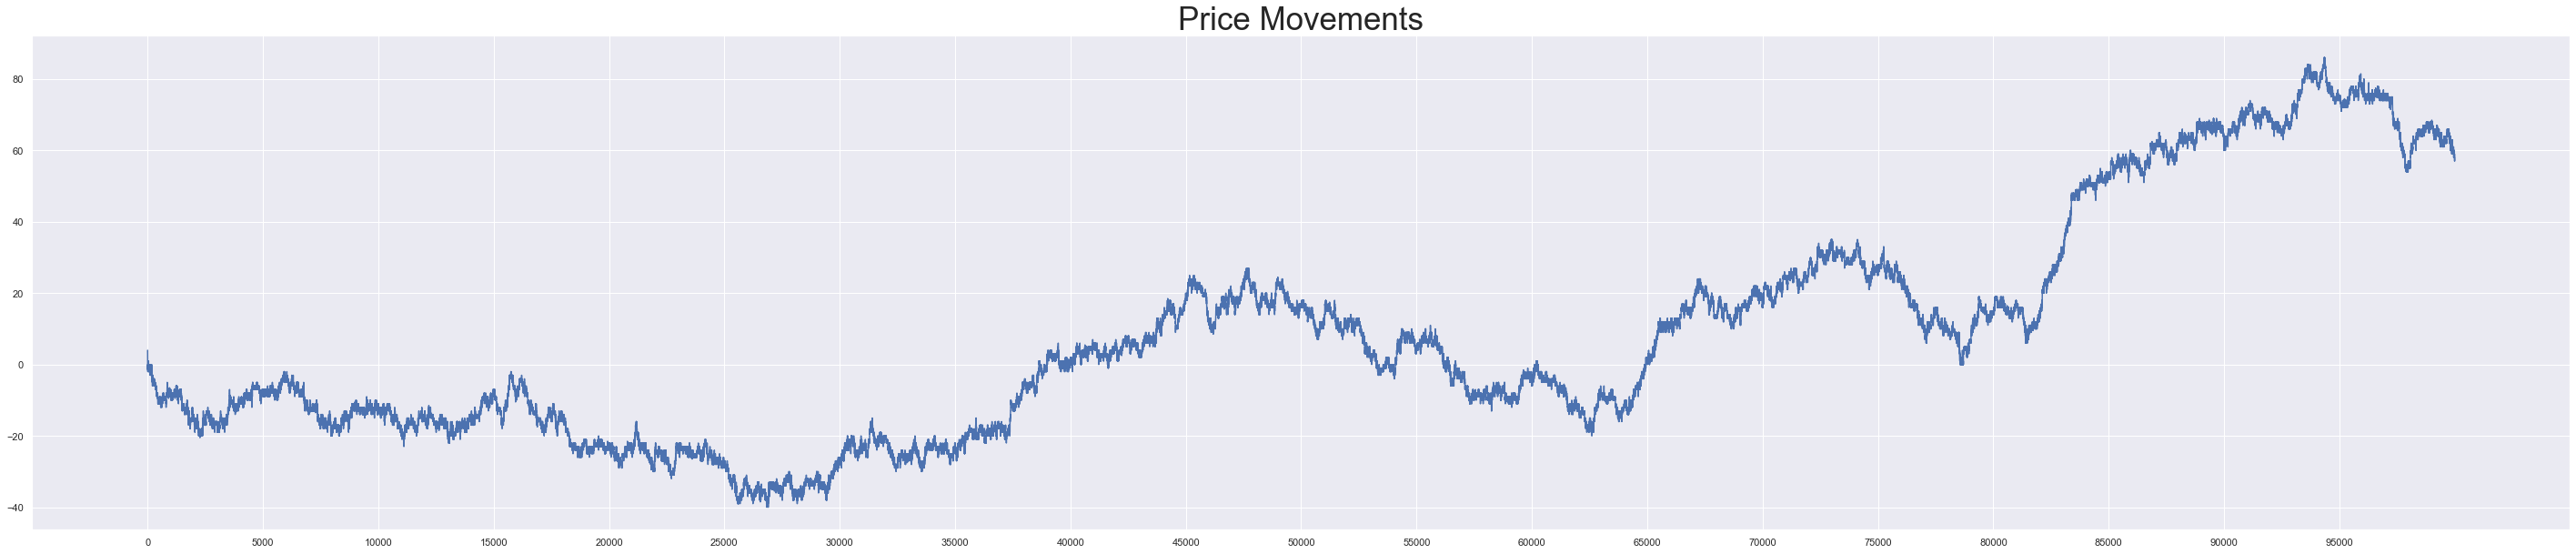

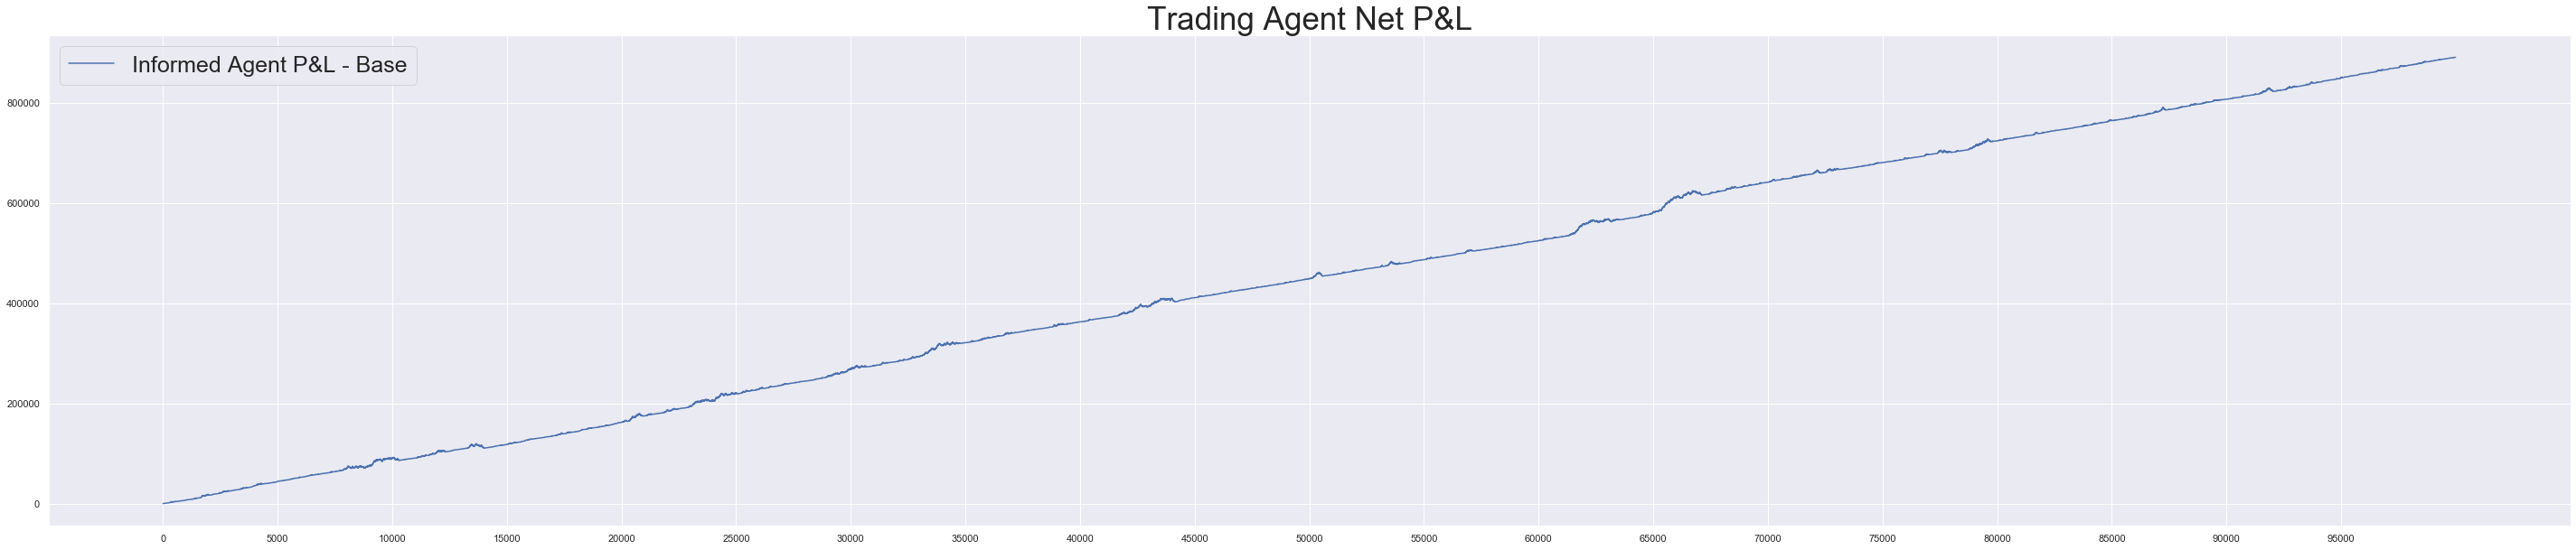

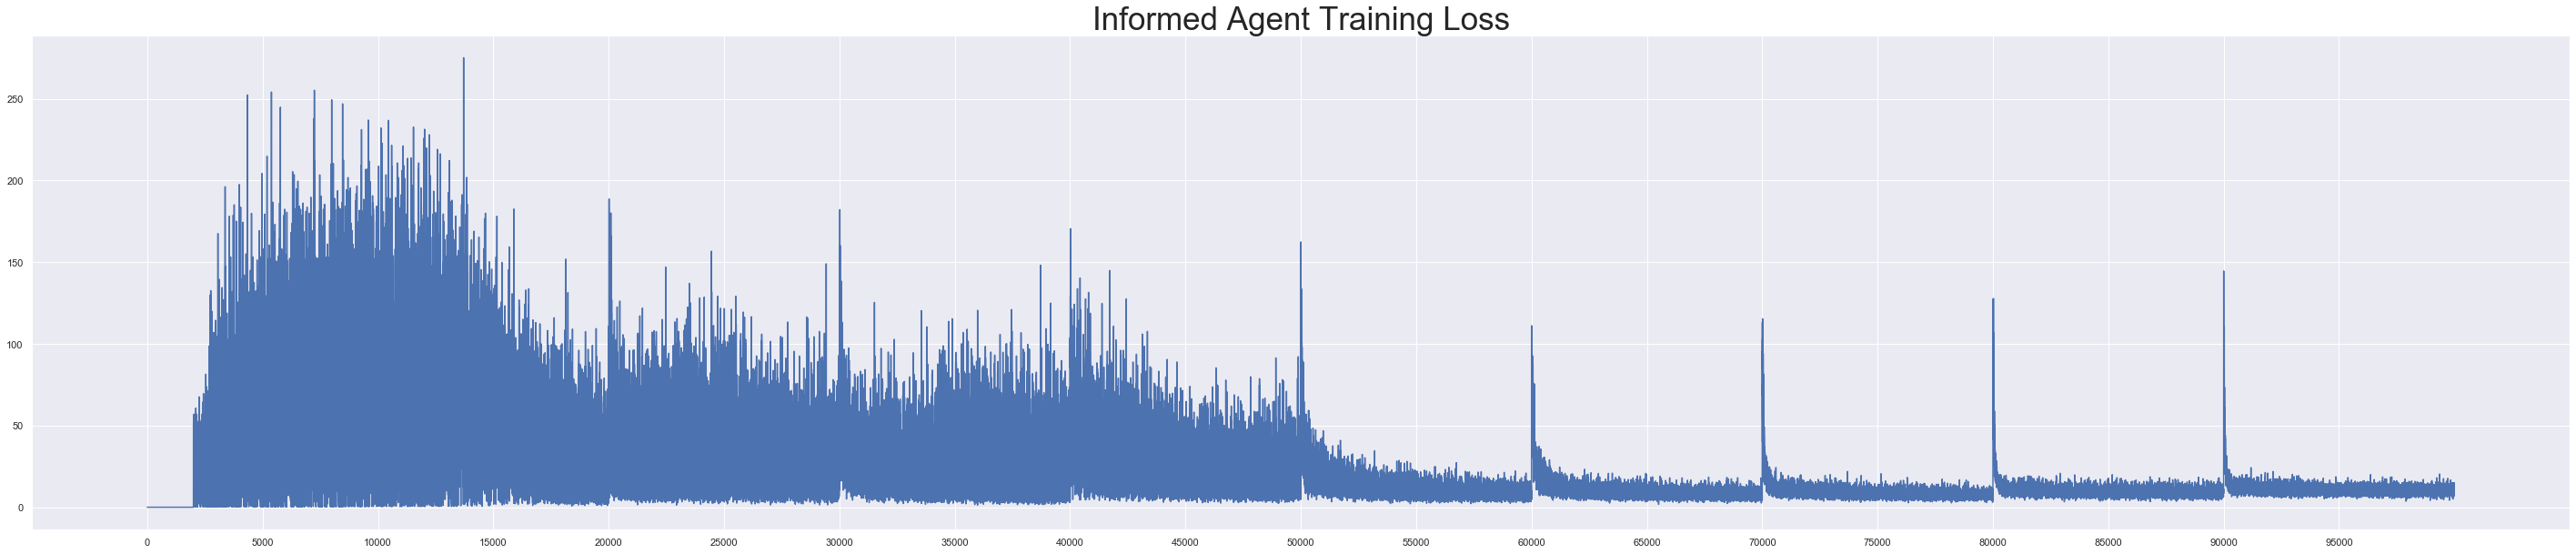

In [28]:
prices = pd.read_csv('prices_informed_eval.csv')
informed_agents_pnl_base = pd.read_csv('informed_agents_pnl_informed_eval.csv')

# plot graph of price movements
fig1 = plt.figure(figsize=(50,10))
plt.plot(range(len(prices)), prices)
plt.title('Price Movements', fontsize=35)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig1.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
# fig1.savefig("./Plots/price_movements_eval_base.png")

# plot portfolio value of informed agent
fig2 = plt.figure(figsize=(50,10))
plt.plot(range(len(informed_agents_pnl_base)), informed_agents_pnl_base, label='Informed Agent P&L - Base')
# plt.plot(range(len(informed_agents_pnl)), informed_agents_pnl, label='Informed Agent P&L - Adversarial')
# plt.plot(range(len(uninformed_agents_pnl)), uninformed_agents_pnl, label='Uninformed Agent P&L')
plt.title('Trading Agent Net P&L', fontsize=35)
plt.legend(fontsize=25)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig2.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
# fig2.savefig("./Plots/training_agent_eval_pnl_base.png")

# training_loss = pd.read_csv('informed_training_loss_base.csv')
training_loss = pd.read_csv('training_loss_aws_final.csv')
fig3 = plt.figure(figsize=(50,10))
plt.plot(range(len(training_loss)), training_loss)
plt.title('Informed Agent Training Loss', fontsize=35)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig3.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
# fig3.savefig("./Plots/training_loss_aws_base.png")

plt.show()

In [24]:
dividend_actions = pd.read_csv('dividend_action_aws_eval.csv', names=['Dividend Amt', 'Informed Action'])
dividend_actions.tail()

,Dividend Amt,Informed Action
99995,20,0
99996,20,1
99997,20,1
99998,20,1
99999,20,0


In [25]:
cross_tab = pd.crosstab(dividend_actions['Dividend Amt'], dividend_actions['Informed Action'])
cross_tab.columns = ['Buy', 'Sell', 'No Action']
cross_tab.loc[-20] = cross_tab.loc[-20] / cross_tab.loc[-20].sum()
cross_tab.loc[20] = cross_tab.loc[20] / cross_tab.loc[20].sum()
display(cross_tab)

,Buy,Sell,No Action
Dividend Amt,,,
-20,0.128795,0.562964,0.308242
20,0.605999,0.162058,0.231942


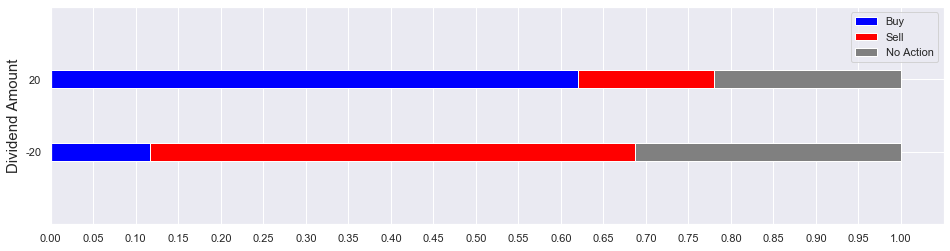

In [21]:
ax = cross_tab.plot(kind='barh', stacked=True, width=0.25, 
                    figsize=(16,4), grid='minor', color=['blue', 'red', 'grey'], 
                    xticks=np.arange(0, 1.05, 0.05),
                    ylim=(0,3))
# plt.xticks(np.arange(0, 50001, 5000))
# plt.legend(loc=1)
plt.yticks(ticks=[0,1], labels=['-20', '20'])
plt.ylim((-1,2))
plt.ylabel('Dividend Amount', fontsize=15)
plt.show()

ax.figure.savefig('./Plots/dividend_actions_base.png')

## Adversarial Eval

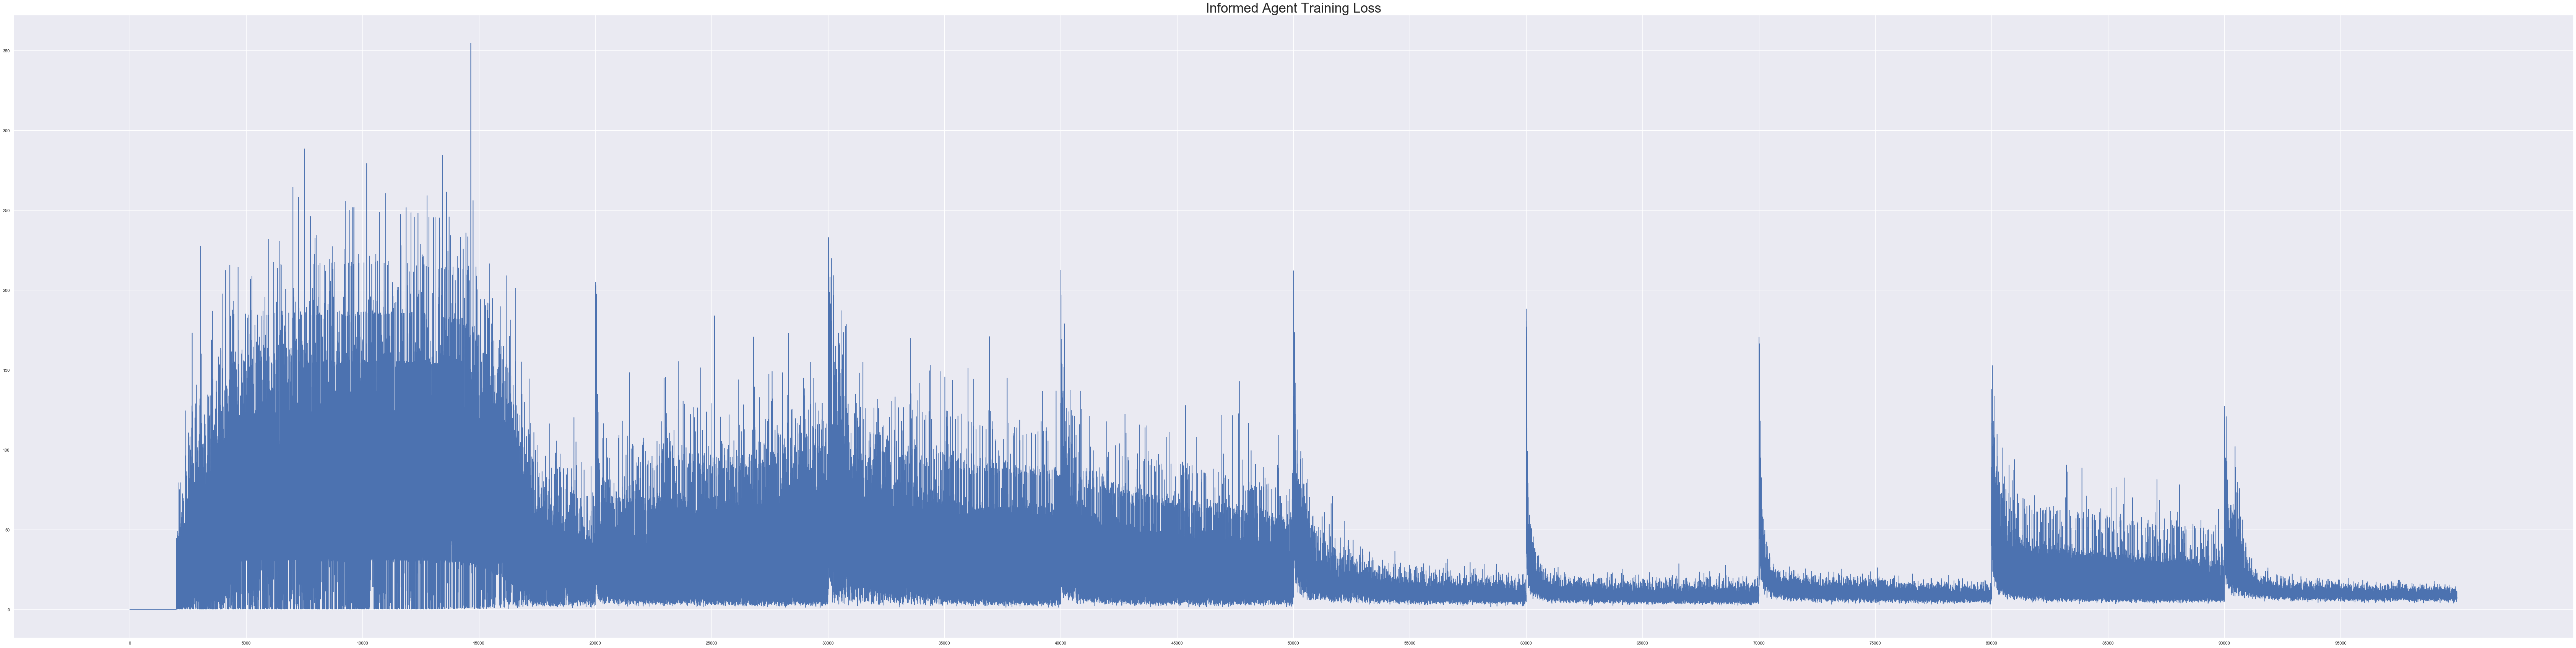

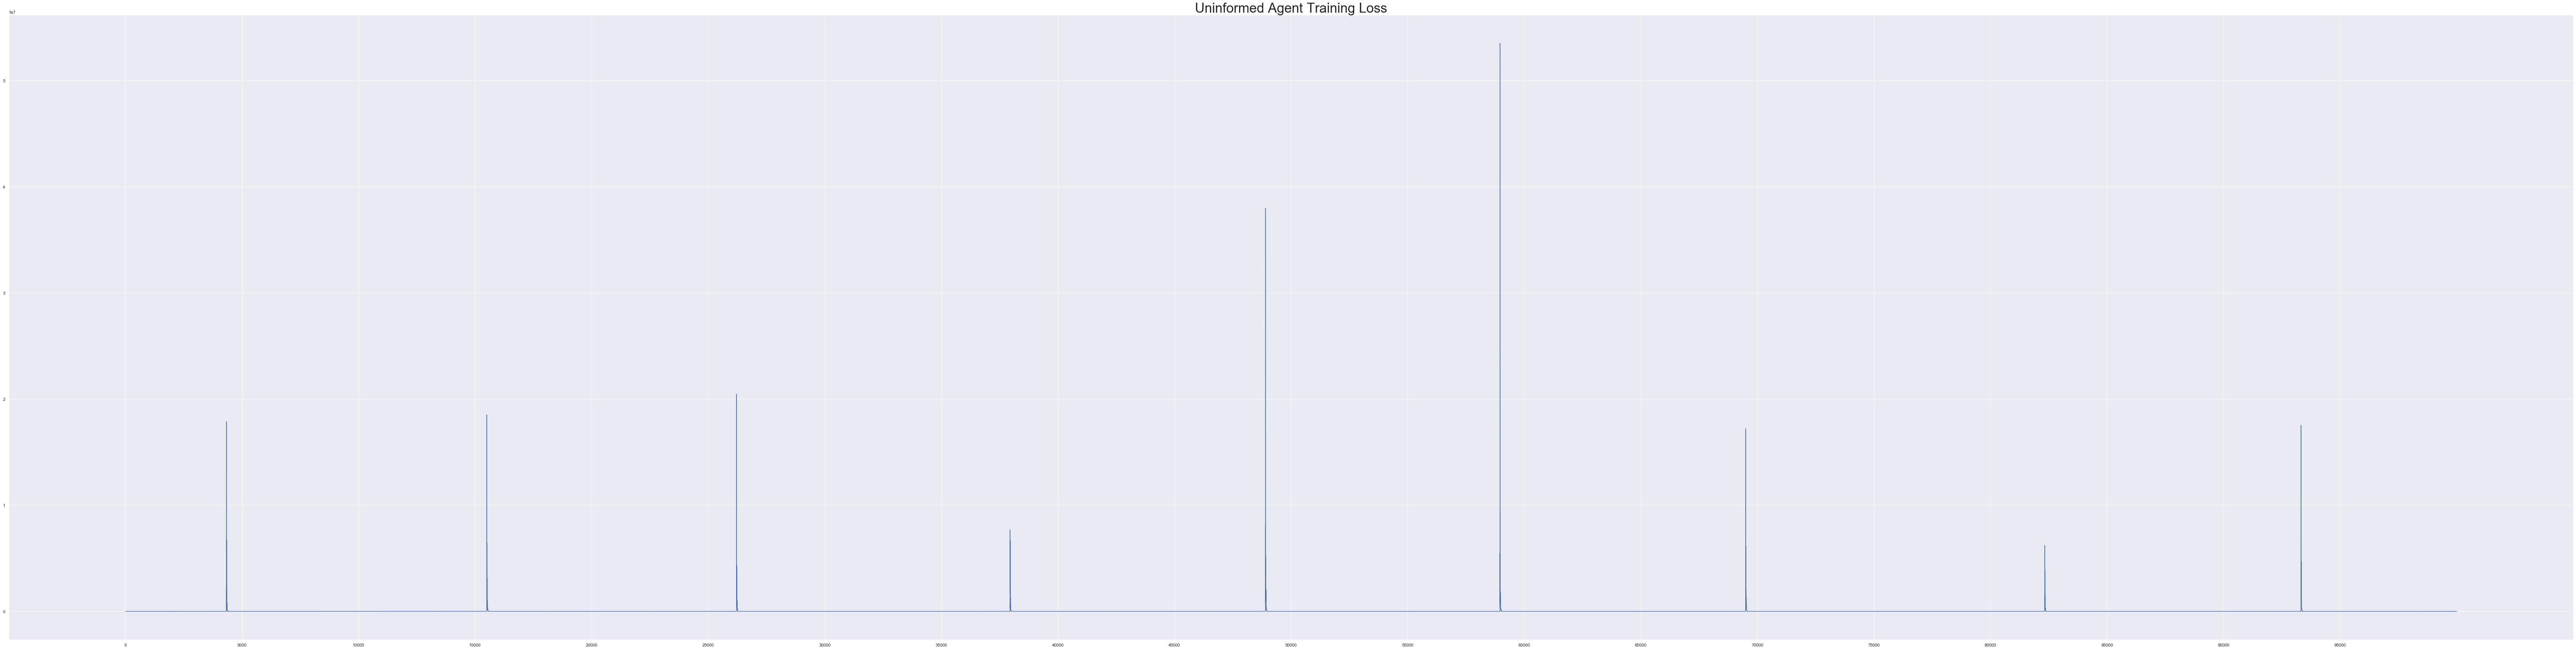

In [24]:
informed_training_loss = pd.read_csv('informed_training_loss_aws.csv')
fig1 = plt.figure(figsize=(120,30))
plt.plot(range(len(informed_training_loss)), informed_training_loss)
plt.title('Informed Agent Training Loss', fontsize=35)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig1.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
# fig1.savefig("./Plots/informed_training_loss_aws.png")

uninformed_training_loss = pd.read_csv('uninformed_training_loss_aws.csv')
fig2 = plt.figure(figsize=(120,30))
plt.plot(range(len(informed_training_loss)), uninformed_training_loss)
plt.title('Uninformed Agent Training Loss', fontsize=35)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig2.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
# fig2.savefig("./Plots/uninformed_training_loss_aws.png")

plt.show()

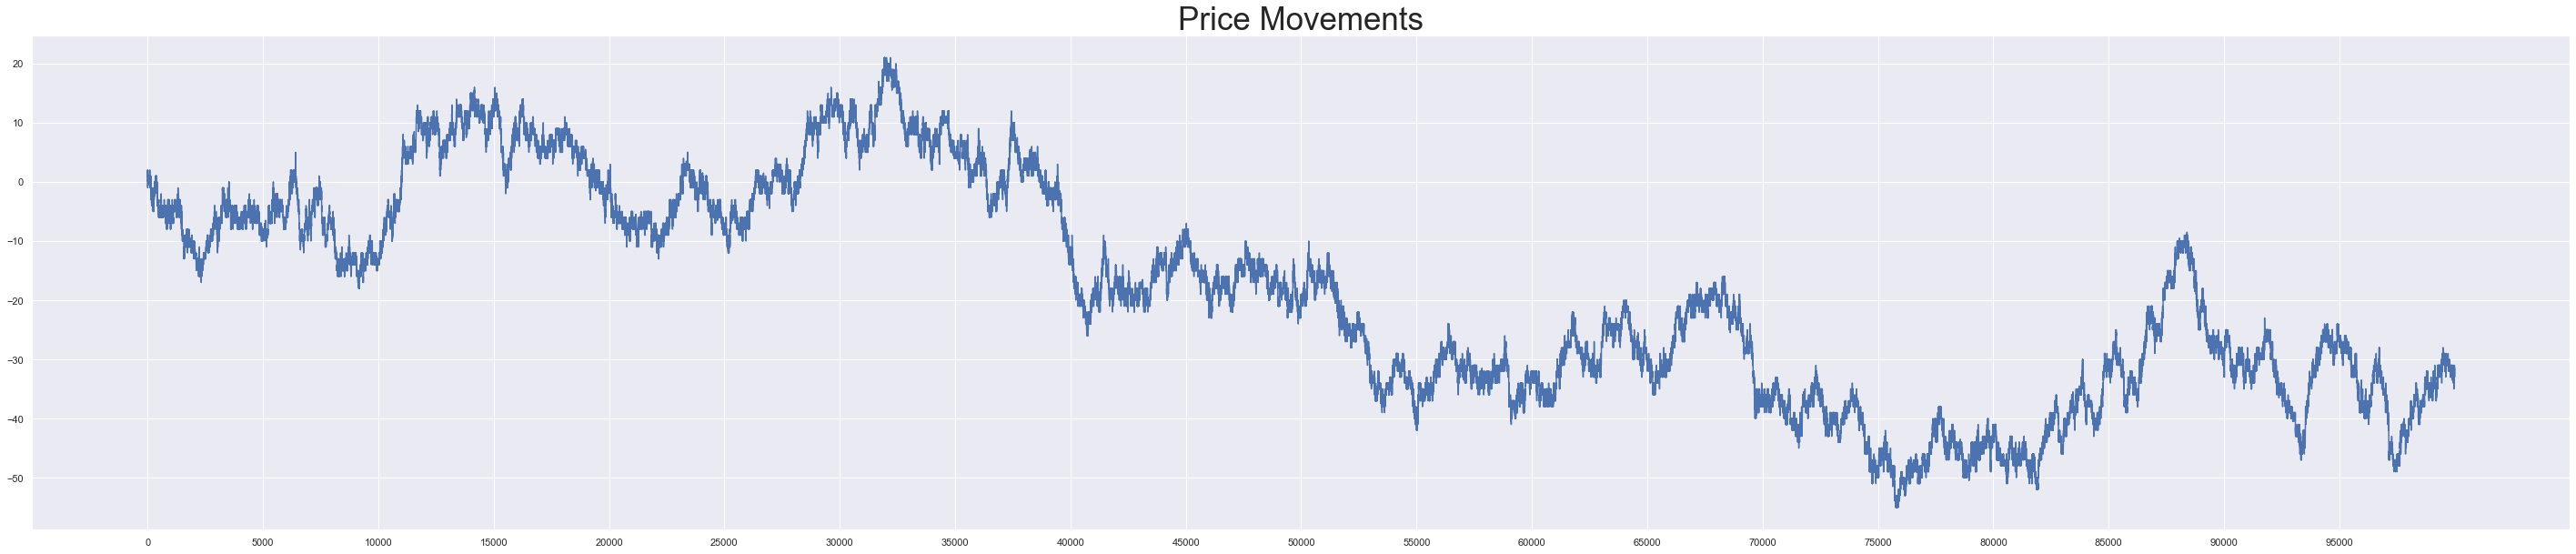

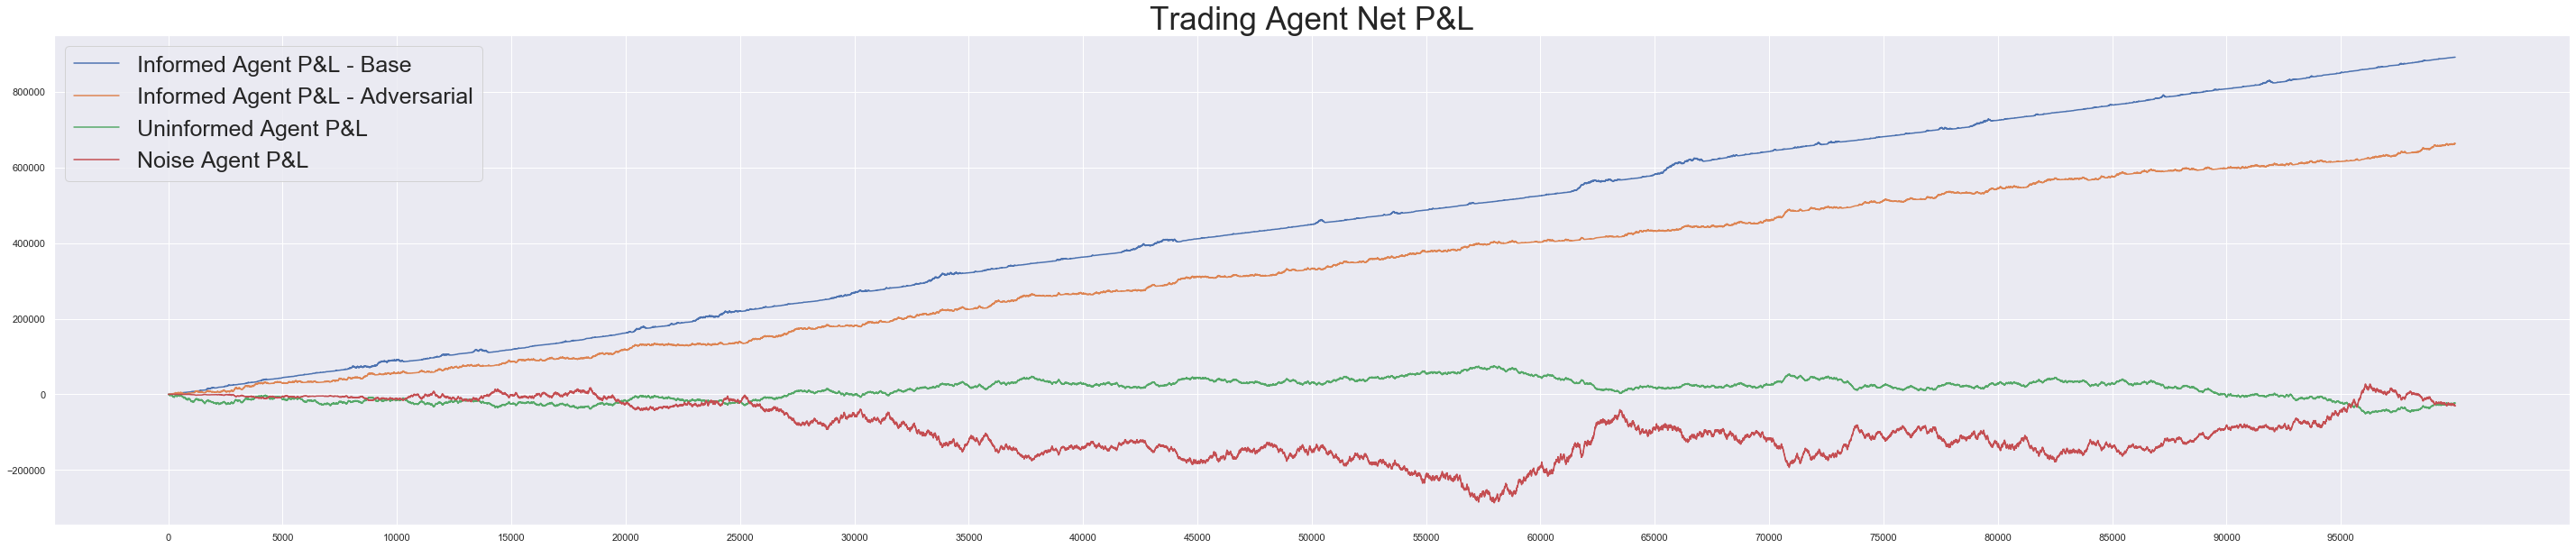

In [27]:
prices = pd.read_csv('prices_adversarial_eval.csv')
informed_agents_pnl_base = pd.read_csv('informed_agents_pnl_informed_eval.csv')
informed_agents_pnl = pd.read_csv('informed_agents_pnl_adversarial_eval.csv')
uninformed_agents_pnl = pd.read_csv('uninformed_agents_pnl_adversarial_eval.csv')
noise_agents_pnl = pd.read_csv('noise_agents_pnl_adversarial_eval.csv')
# pnl_sum = informed_agents_pnl + uninformed_agents_pnl

# plot graph of price movements
fig3 = plt.figure(figsize=(50,10))
plt.plot(range(len(prices)), prices)
plt.title('Price Movements', fontsize=35)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig3.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
fig3.savefig("./Plots/price_movements_adversarial_eval.png")

# plot portfolio value of informed agent
fig4 = plt.figure(figsize=(50,10))
plt.plot(range(len(informed_agents_pnl_base)), informed_agents_pnl_base, label='Informed Agent P&L - Base')
plt.plot(range(len(informed_agents_pnl)), informed_agents_pnl, label='Informed Agent P&L - Adversarial')
plt.plot(range(len(uninformed_agents_pnl)), uninformed_agents_pnl, label='Uninformed Agent P&L')
plt.plot(range(len(noise_agents_pnl)), noise_agents_pnl, label='Noise Agent P&L')
# plt.plot(range(len(pnl_sum)), pnl_sum, label='Total Value Extracted')
plt.title('Trading Agent Net P&L', fontsize=35)
plt.legend(fontsize=25, loc=0)
plt.xticks(np.arange(0, DEBUG_ROUNDS, 5000))
fig4.axes[0].grid(which='minor', color='w', linestyle=':', linewidth=2)
fig4.savefig("./Plots/training_agent_pnl_adversarial_eval.png")

plt.show()

In [14]:
# pearson correlation
pearsonr(prices['0'].values, informed_agents_pnl['0'].values)

(-0.8109517184609452, 0.0)

In [155]:
dividend_actions = pd.read_csv('dividend_action_adversarial_eval.csv', names=['Dividend Amt', 'Informed Action', 'Uninformed Action'])
dividend_actions.tail(10)

,Dividend Amt,Informed Action,Uninformed Action
99990,20,0,1
99991,20,2,0
99992,20,2,2
99993,20,2,2
99994,20,2,1
99995,20,2,0
99996,20,1,1
99997,20,1,0
99998,20,0,2
99999,20,0,2


In [156]:
informed_cross_tab = pd.crosstab(dividend_actions['Dividend Amt'], dividend_actions['Informed Action'])
informed_cross_tab.columns = ['Buy', 'Sell', 'No Action']
informed_cross_tab.loc[-20] = informed_cross_tab.loc[-20] / informed_cross_tab.loc[-20].sum()
informed_cross_tab.loc[20] = informed_cross_tab.loc[20] / informed_cross_tab.loc[20].sum()
display(informed_cross_tab)

uninformed_cross_tab = pd.crosstab(dividend_actions['Dividend Amt'], dividend_actions['Uninformed Action'])
uninformed_cross_tab.columns = ['Buy', 'Sell', 'No Action']
uninformed_cross_tab.loc[-20] = uninformed_cross_tab.loc[-20] / uninformed_cross_tab.loc[-20].sum()
uninformed_cross_tab.loc[20] = uninformed_cross_tab.loc[20] / uninformed_cross_tab.loc[20].sum()
display(uninformed_cross_tab)

,Buy,Sell,No Action
Dividend Amt,,,
-20,0.188881,0.558765,0.252354
20,0.484624,0.113488,0.401889


,Buy,Sell,No Action
Dividend Amt,,,
-20,0.331921,0.332061,0.336019
20,0.330679,0.329538,0.339783


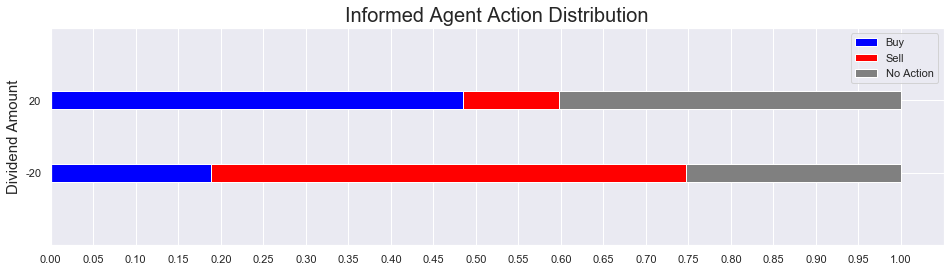

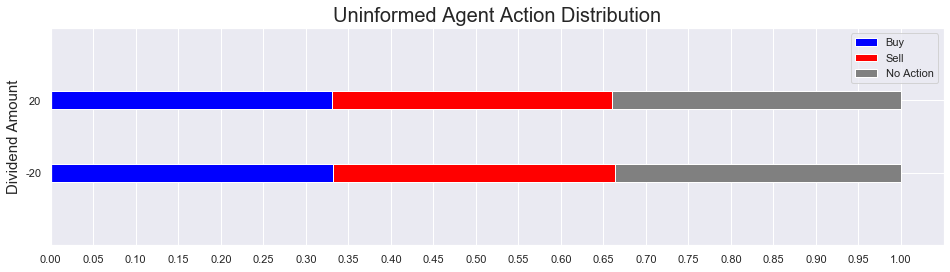

In [157]:
ax = informed_cross_tab.plot(kind='barh', stacked=True, width=0.25, 
                             figsize=(16,4), grid='minor', color=['blue', 'red', 'grey'], 
                             xticks=np.arange(0, 1.05, 0.05),
                             ylim=(0,3))
# plt.xticks(np.arange(0, 50001, 5000))
# plt.legend(loc=1)
plt.yticks(ticks=[0,1], labels=['-20', '20'])
plt.ylim((-1,2))
plt.title('Informed Agent Action Distribution', fontsize=20)
plt.ylabel('Dividend Amount', fontsize=15)
plt.show()

# ax.figure.savefig('./Plots/informed_dividend_actions_adversarial.png')

ax = uninformed_cross_tab.plot(kind='barh', stacked=True, width=0.25, 
                               figsize=(16,4), grid='minor', color=['blue', 'red', 'grey'], 
                               xticks=np.arange(0, 1.05, 0.05),
                               ylim=(0,3))
# plt.xticks(np.arange(0, 50001, 5000))
# plt.legend(loc=1)
plt.yticks(ticks=[0,1], labels=['-20', '20'])
plt.ylim((-1,2))
plt.title('Uninformed Agent Action Distribution', fontsize=20)
plt.ylabel('Dividend Amount', fontsize=15)
plt.show()

# ax.figure.savefig('./Plots/uninformed_dividend_actions_adversarial.png')